<a href="https://colab.research.google.com/github/ydicsey/image-processing/blob/main/Otsu%E2%80%99s_thresholding_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the library
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
!git clone https://github.com/mikolalysenko/lena.git

Cloning into 'lena'...
remote: Enumerating objects: 28, done.
remote: Total 28 (delta 0), reused 0 (delta 0), pack-reused 28
Unpacking objects: 100% (28/28), 1.14 MiB | 2.91 MiB/s, done.


read image as gray

In [ ]:
img_path = '/content/lena/lena.png'
img = cv.imread(img_path, 0)
img.shape

(512, 512)

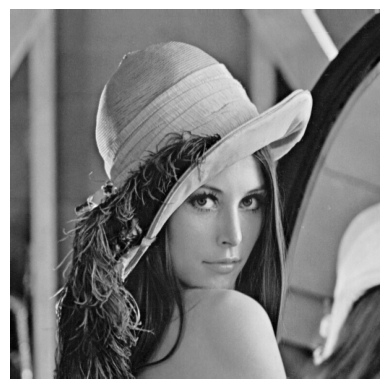

In [ ]:
plt.axis('off')
plt.imshow(img, cmap = "gray")
plt.show()

show histogram

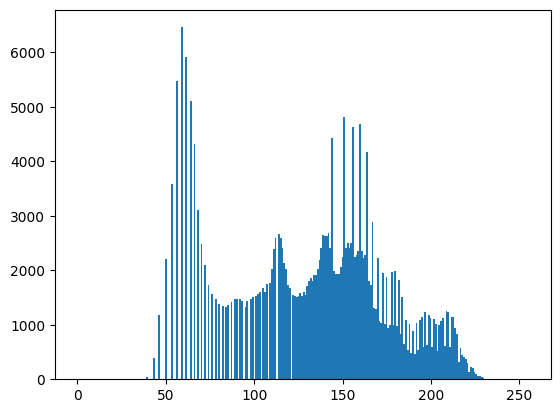

In [ ]:
plt.hist(img.ravel(), bins=256, range=(0, 255))
plt.show()

implement Otsu’s thresholding method

In [ ]:
def otsu(gray):
    h, w = gray.shape
    N = h*w

    otsu_img = np.zeros((h, w))
    # 初始化為了計算t=>threshold
    max_variance = -1
    threshold = -1

    # iterative L=256
    for i in range(256):
        sum_0 = gray[np.where(gray < i)]
        sum_1 = gray[np.where(gray >= i)]
        # compute the probability
        p_0 = len(sum_0) / N
        p_1 = len(sum_1) / N
        # compute mean
        m_0 = np.mean(sum_0) if len(sum_0) > 0 else 0.
        m_1 = np.mean(sum_1) if len(sum_1) > 0 else 0.

        # find max t
        var = p_0 * p_1 * (m_0 - m_1) **2
        if(var > max_variance):
            threshold = i
            max_variance = var
    otsu_img[gray >= threshold] = 255
    otsu_img[gray < threshold] = 0

    return otsu_img.astype(np.uint8)

In [ ]:
otsu_img = otsu(img)
_, otsu_cv = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

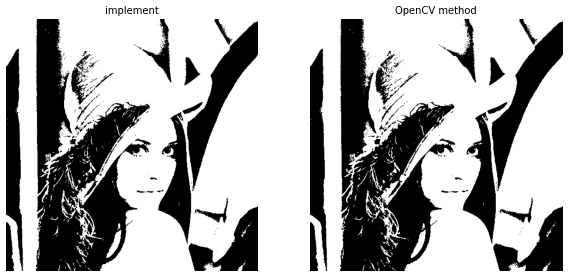

In [ ]:
f = plt.figure(num=None, figsize=(12, 12), dpi=60)

ax1 = f.add_subplot(2,2, 2)
plt.axis('off')
plt.imshow(otsu_cv, cmap="gray")
ax1.title.set_text('OpenCV method')

ax2 = f.add_subplot(2,2, 1)
plt.axis('off')
plt.imshow(otsu_img, cmap="gray")
ax2.title.set_text('implement')

plt.show()

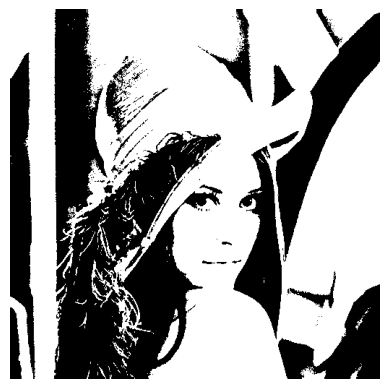

In [ ]:
plt.axis('off')
plt.imshow(otsu_img, cmap = "gray")
plt.show()

In [ ]:
print(np.all(otsu_img == otsu_cv))

True
